<a href="https://colab.research.google.com/github/yashveersinghsohi/TSF_GRIP_DSBA/blob/master/Task2/TSF_GRIP_DSBA_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2 - Prediction using Unsupervised ML

**By: Yashveer Singh Sohi** <br>
Data Science and Business Analytics Intern at The Sparks Foundation

## Problem Description

- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
- Dataset : https://bit.ly/3kXTdox

## Importing required packages

In this notebook:
- [pandas](https://pandas.pydata.org/docs/) and [numpy](https://numpy.org/doc/) are used for data manipulation.
- [matplotlib.pyplot](https://matplotlib.org/3.3.3/contents.html) and [seaborn](https://seaborn.pydata.org/) are used for plotting and data visualization.
- [sklearn](https://scikit-learn.org/stable/) is used for building a K-Means Clusterring model for the data, and for evaluating the model.

In [1]:
# For Data Manipulation 
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For model building and evaluation
from sklearn.cluster import KMeans

## Reading the data

- Using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method, the data is loaded into a pandas **dataframe** from the file in the URL mentioned above.

In [2]:
# File Path for the dataset
# Download this from the URL mentioned above
data_path = "/content/Iris.csv"

# Loading Data into a pandas dataframe
data = pd.read_csv(data_path)

# Show first 5 rows of the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Checking for Null Values

- [isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) function is used to detect missing values for an array-like object.
- If a value is missing, it is set to **True** in the array returned by **isnull** function.
- Since, **True** is equivalant to 1, and **False** is equivalant to 0, the **sum** function will return the number of missing values for each column in the dataframe.

In [3]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Observations:** Clearly the data does not contain any missing values.

## Data Visualization

### Scatter Plots

In this section, scatter plots are built for each pair of the following columns: `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm`.

- The [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function in matplotlib is used to set the number of subplots, and the size of the figure.
- The scatter plot is built using [scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html) function in matplotlib.pyplot.
- The [set_title](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html), [set_xlabel](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html) and [set_ylabel](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html) functions are used to set the Title, and axis labels for each subplot.
- The legends are displayed in the plots using the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function. 
- To display the figure [show](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) function is used.

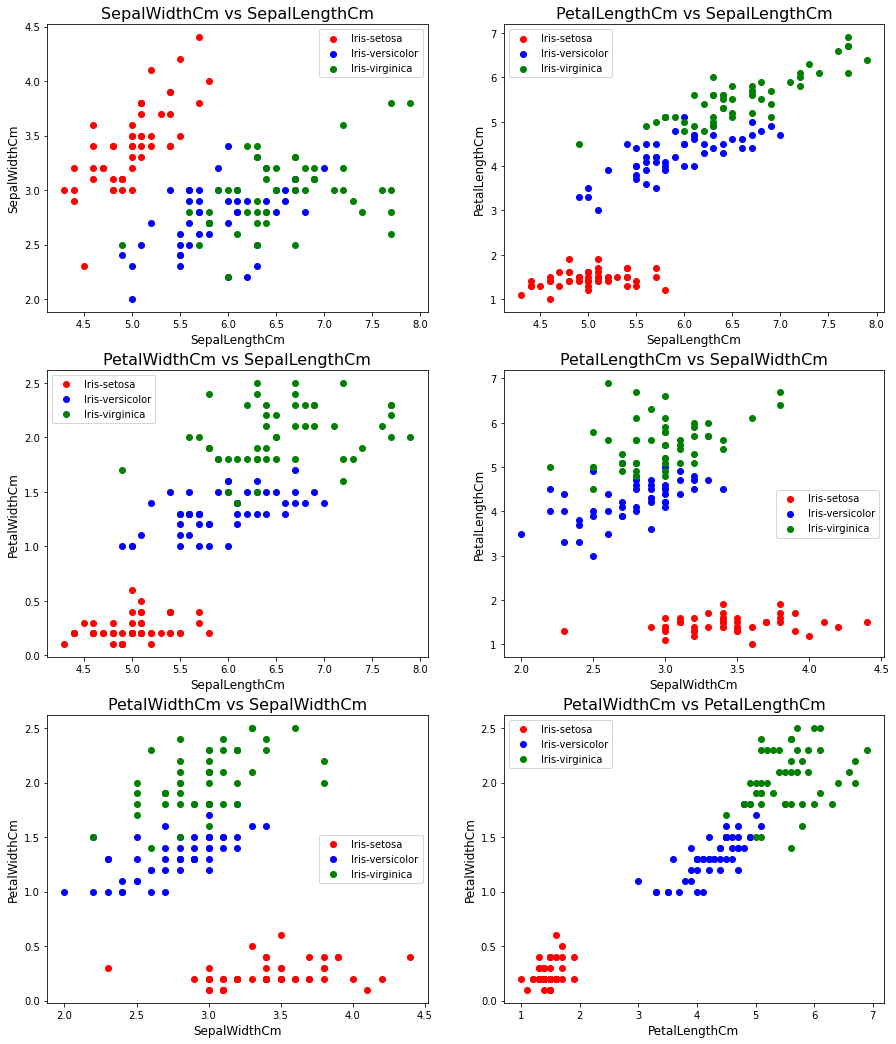

In [4]:
# Helper function to plot scatter plots
def plot_scatter_plots(df, x, y, ax):
  # Plot Iris-setosa points
  ax.scatter(df[df["Species"] == "Iris-setosa"][x], 
             df[df["Species"] == "Iris-setosa"][y], 
             color = "red", label = "Iris-setosa")

  # Plot Iris-versicolor points
  ax.scatter(df[df["Species"] == "Iris-versicolor"][x], 
             df[df["Species"] == "Iris-versicolor"][y], 
             color = "blue", label = "Iris-versicolor")

  # Plot Iris-virginica points
  ax.scatter(df[df["Species"] == "Iris-virginica"][x], 
             df[df["Species"] == "Iris-virginica"][y], 
             color = "green", label = "Iris-virginica")

  # Setting Title and axis labels
  ax.set_title(y + " vs " + x, size = 16)
  ax.set_xlabel(x, size = 12)
  ax.set_ylabel(y, size = 12)

  # Showing Legends
  ax.legend()


# Setting number of subplots and size of figure
fig, ax = plt.subplots(3, 2, figsize = (15, 18))

# Plotting Pair-wise scatter plots  
plot_scatter_plots(data, "SepalLengthCm", "SepalWidthCm", ax[0, 0])
plot_scatter_plots(data, "SepalLengthCm", "PetalLengthCm", ax[0, 1])
plot_scatter_plots(data, "SepalLengthCm", "PetalWidthCm", ax[1, 0])
plot_scatter_plots(data, "SepalWidthCm", "PetalLengthCm", ax[1, 1])
plot_scatter_plots(data, "SepalWidthCm", "PetalWidthCm", ax[2, 0])
plot_scatter_plots(data, "PetalLengthCm", "PetalWidthCm", ax[2, 1])

# Displaying Plots
plt.show()

**Observations:** In all cases, **Iris-setosa** points form a clearly distinguishable cluster. There is some overlap in the other 2 species across all plots.  

## Data Preperation

The goal of this project is to find the optimal number of clusters for the data given. There are 3 species given in the data, and hence ideally we should get 3 clusters.

Therefore, in this notebook we will use the K-Means clustering algorithm on the columns `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, and `PetalWidthCm` to verify whether we get the optimal number of clusters as 3. The clusters are compared based on the **Within Cluster Sum of Squares (WCSS)** error metric.

- The features listed above are represented by **X**.
- The categories are represented by **y**.
- The [values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html) function converts the columns to numpy arrays. 
- The [shape](https://numpy.org/devdocs/reference/generated/numpy.shape.html) function gives the dimensions of a numpy array.

In [5]:
# Extracting all features into new array
X = data[["SepalLengthCm", 
          "SepalWidthCm", 
          "PetalLengthCm", 
          "PetalWidthCm"]].values

# Extracting all categories into new array
y = data["Species"].values

# Printing shape of features and categories
print("Features shape: ", X.shape)
print("Categories shape: ", y.shape)

Features shape:  (150, 4)
Categories shape:  (150,)


## K-Means

### Model Training 

- Here, 10 K-Means models are trained. The value of k (numner of clusters) ranges from 1, 2, 3...10.
- The WCSS scores of each K-Means model is tracked in a dictionary.
- [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) function in sklearn is used to instantiate the model, and the [fit](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit) method is used for training.
- `random_state = 42` makes sure that the results can be regenerated exactly.
- The value of **k** is passed in the `n_clusters` parameter. 
- The `inertia_` variable in KMeans object contains the **WCSS** score.

In [6]:
# Initializing empty dictionary for tracking performance
performance_log = {}

# Fitting K-Means models for k = 1, 2, 3....10, 
# and tracking the performance in 'performance_log' dictionary 
for no_clusters in range(1, 11):
  # Model Fitting
  kmeans = KMeans(n_clusters = no_clusters, 
                  random_state = 42).fit(X)
  
  # Performance Log
  performance_log[no_clusters] = kmeans.inertia_

### Visualizing Performance

- The performance of each model is visualized usnig a simple line plot.
- The [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) function is used to plot the WCSS scores.
- The `marker` and `label` arguments in the plotting functions are used to style the plots. (refer docs of [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html))
- The size of the figure is set using [figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) function.
- The [title](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html) , [xlabel](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html) , and [ylabel](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylabel.html) functions are used to set the **Title**, **X-axis label**, and **Y-axis label** respectively.
- To display the figure [show](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) function is used.
- To display the legends [legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) function is used.
- To display the plot in a grid, the [grid](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html) function is used.

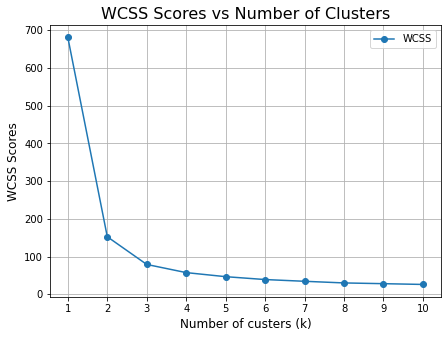

In [7]:
# X, Y points for plotting
x_points = list(performance_log.keys())
y_points = list(performance_log.values())


# Setting Plot size
plt.figure(figsize = (7, 5))

# Plotting Points
plt.plot(x_points, y_points, marker = "o", label = "WCSS")
# Fixing X-ticks
plt.xticks(x_points, x_points)

# Setting plot title, and axis labels
plt.title("WCSS Scores vs Number of Clusters", size = 16)
plt.xlabel("Number of custers (k)", size = 12)
plt.ylabel("WCSS Scores", size = 12)

# Displaying the plot in a grid, and dislaying the legends
plt.legend()
plt.grid()
plt.show()

**Observations:** Clearly, there is rapid improvement in performance as we increase the number of clusters from 1, to 3. After 3, the performance increases, but not very rapidly. Thus, 3 seems like the ideal choice for the number of clusters.

### Final Model

**Model instantiation and fitting**

In [8]:
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(X)

**Cluster Centroids**

These are found in the `cluster_centers_` variable of the KMeans object.

In [9]:
# Extracting the centroids of the 3 clusters
centroids = kmeans.cluster_centers_

# Displaying the centroids
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

**Clusters**

Here, the points in the dataset are labeled according to their clusters using the [predict](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict) method.

In [10]:
# Predicting the cluster labels for all points in the dataset
predictions = kmeans.predict(X)

# Displaying the predicted labels
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## Visualizing Clusters

This cell plots the scatter plots for the dataset and scatter plots for the clusters identified by K-Means algorithm.

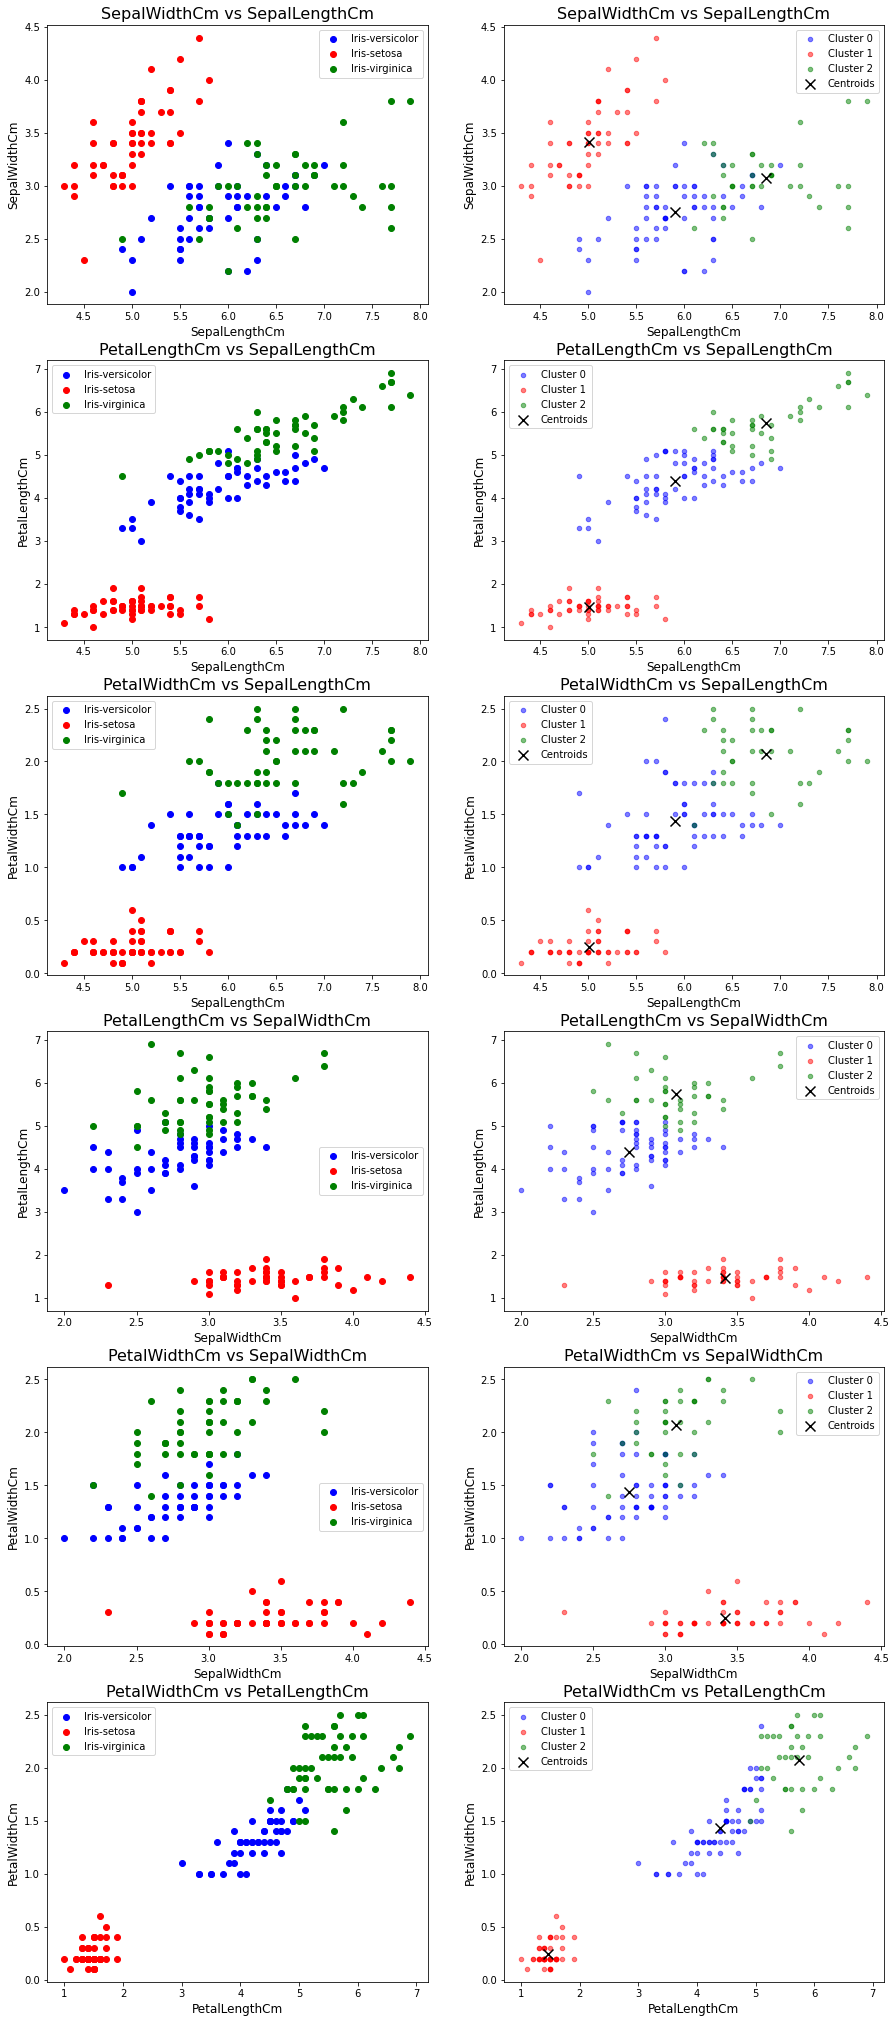

In [11]:
# Helper function to plot cluster points
def plot_clusters(df, data_arr, preds, centroids, 
                  x_col_idx, y_col_idx, ax):
  # Plot cluster 0 points
  ax.scatter(data_arr[preds == 0][:, x_col_idx], 
             data_arr[preds == 0][:, y_col_idx], 
             color = "blue", alpha = 0.5, 
             s = 20, label = "Cluster 0")

  # Plot cluster 1 points
  ax.scatter(data_arr[preds == 1][:, x_col_idx], 
             data_arr[preds == 1][:, y_col_idx], 
             color = "red", alpha = 0.5,
             s = 20, label = "Cluster 1")

  # Plot cluster 2 points
  ax.scatter(data_arr[preds == 2][:, x_col_idx], 
             data_arr[preds == 2][:, y_col_idx], 
             color = "green", alpha = 0.5, 
             s = 20, label = "Cluster 2")

  # Plotting Centroids
  ax.scatter(centroids[:,  x_col_idx], centroids[:, y_col_idx], 
             marker = "x", color = "black", 
             s = 100, label = "Centroids")


  # Setting Title and axis labels
  x_label, y_label = df.columns[x_col_idx+1], df.columns[y_col_idx+1]
  ax.set_title(y_label + " vs " + x_label, size = 16)
  ax.set_xlabel(x_label, size = 12)
  ax.set_ylabel(y_label, size = 12)

  # Showing Legends
  ax.legend()



# Helper function to plot scatter plots
def plot_scatter_plots(df, x, y, ax):
  # Plot Iris-versicolor points
  ax.scatter(df[df["Species"] == "Iris-versicolor"][x], 
             df[df["Species"] == "Iris-versicolor"][y], 
             color = "blue", label = "Iris-versicolor")
  
  # Plot Iris-setosa points
  ax.scatter(df[df["Species"] == "Iris-setosa"][x], 
             df[df["Species"] == "Iris-setosa"][y], 
             color = "red", label = "Iris-setosa")  

  # Plot Iris-virginica points
  ax.scatter(df[df["Species"] == "Iris-virginica"][x], 
             df[df["Species"] == "Iris-virginica"][y], 
             color = "green", label = "Iris-virginica")

  # Setting Title and axis labels
  ax.set_title(y + " vs " + x, size = 16)
  ax.set_xlabel(x, size = 12)
  ax.set_ylabel(y, size = 12)

  # Showing Legends
  ax.legend()


# Setting number of subplots and size of figure
fig, ax = plt.subplots(6, 2, figsize = (15, 36))

# Plotting Pair-wise scatter plots for dataset (Column 1)
plot_scatter_plots(data, "SepalLengthCm", "SepalWidthCm", ax[0, 0])
plot_scatter_plots(data, "SepalLengthCm", "PetalLengthCm", ax[1, 0])
plot_scatter_plots(data, "SepalLengthCm", "PetalWidthCm", ax[2, 0])
plot_scatter_plots(data, "SepalWidthCm", "PetalLengthCm", ax[3, 0])
plot_scatter_plots(data, "SepalWidthCm", "PetalWidthCm", ax[4, 0])
plot_scatter_plots(data, "PetalLengthCm", "PetalWidthCm", ax[5, 0])


# Plotting Pair-wise scatter plots for clusters (Column 2)
plot_clusters(data, X, predictions, centroids, 0, 1, ax[0, 1])
plot_clusters(data, X, predictions, centroids, 0, 2, ax[1, 1])
plot_clusters(data, X, predictions, centroids, 0, 3, ax[2, 1])
plot_clusters(data, X, predictions, centroids, 1, 2, ax[3, 1])
plot_clusters(data, X, predictions, centroids, 1, 3, ax[4, 1])
plot_clusters(data, X, predictions, centroids, 2, 3, ax[5, 1])

# Displaying Plots
plt.show()

**Observations:** 
- As expected, the cluster for **Iris-setosa** (marked in red) is matching well with the real data.
- There are certain data points in the other 2 species that are mis classified.
- In the next section the number of such misclassified points are counted.

## Mis-classified points

- The [copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) function is used to create a copy of a dataframe.
- The [crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) function is used to compute a simple cross tabulation of two (or more) factors.

In [27]:
# Creating a new DataFrame for comparing 
# predicted clusters with actual categories
predictions_df = data.copy()

# Storing Predicted Labels
predictions_df["Predictions"] = predictions

# Displaying the Categories and cluster labels
pd.crosstab(predictions_df["Species"].values, 
            predictions_df["Predictions"].values, 
            rownames = ["Species"], colnames = ["Clusters"])

Clusters,0,1,2
Species,,,
Iris-setosa,0,50,0
Iris-versicolor,48,0,2
Iris-virginica,14,0,36


**Observations:** 
- All the **Iris-setosa** points were correctly grouped into one cluster (**Cluster 1**).
- Most of the **Iris-versicolor** points (48/50) were correctly placed in one cluster (**Cluster 0**)
- A significant segment of **Iris-virginica** points (14/50) were places in a seperate cluster (**Cluster 0**) than the majority of the points of this category (**Cluster 2**) 